# The Spark Foundation
## Data Science and Business Analytics Internship(Task-1)
### Amalesh Adhikary

In [1]:
"""Predict using supervised ML"""
#importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [4]:
#importing data
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#check if the data is null
data.isnull == True

False

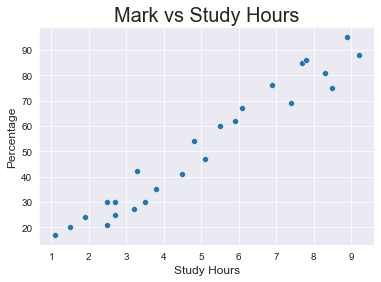

In [6]:
#marks vs study hour 
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x=data['Hours'])
plot.title('Mark vs Study Hours', size=20)
plot.ylabel('Percentage', size=12)
plot.xlabel('Study Hours', size=12)
plot.show()

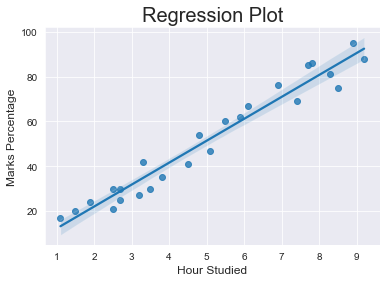

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(x=data['Hours'], y=data['Scores'])
plot.title('Regression Plot', size=20)
plot.ylabel('Marks Percentage', size=12)
plot.xlabel('Hour Studied', size=12)
plot.show()
print(data.corr())

In [8]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

train_X, val_X, train_Y, val_Y = train_test_split(X, Y)

In [9]:
regression = LinearRegression()
regression.fit(train_X, train_Y)
print("-------------Model Trained----------")

-------------Model Trained----------


**Predicting the Percentage of Marks**

In [10]:
#predict the marks based on study hours
pred_Y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
prediction

,Hours,Predicted Marks
0,8.3,84.229608
1,7.4,75.330594
2,1.9,20.947731
3,2.7,28.857966
4,4.8,49.622332
5,5.1,52.588670
6,6.9,70.386698


In [11]:
# Compare actual vs predicted marks
compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_Y})
compare_scores

,Actual Marks,Predicted Marks
0,81,84.229608
1,69,75.330594
2,24,20.947731
3,25,28.857966
4,54,49.622332
5,47,52.588670
6,76,70.386698


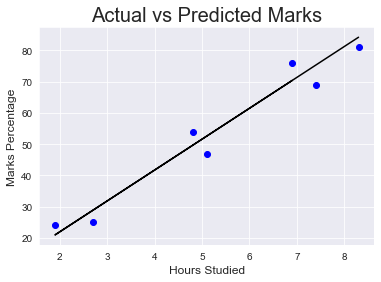

In [12]:
# plot view of actual vs predicted marks
plot.scatter(x=val_X, y=val_Y, color='blue')
plot.plot(val_X, pred_Y, color='Black')
plot.title("Actual vs Predicted Marks", size=20)
plot.ylabel('Marks Percentage', size=12)
plot.xlabel('Hours Studied', size=12)
plot.show()

In [13]:
# Calculating the accuracy of the model
print('Mean absolute error: ', mean_absolute_error(val_Y, pred_Y))

Mean absolute error:  4.578582492727343


**What will be the predicted score of a student if he/she studies for 9.25 hrs/day**

In [14]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0], 3)))

Score = 93.623


**So according to the regression model if a student studies for 9.25 hours a day then he/she is likely to score 93.623 marks**